<a href="https://colab.research.google.com/github/sidhu2690/IDC-410/blob/main/MLP_assignment_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
!unzip data.zip

Archive:  data.zip
replace mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [12]:
def load_data(file_path):
    x_data = []
    y_data = []

    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            values = line.strip().split(',')
            label = float(values[0])
            image = [float(val) / 255.0 for val in values[1:]]
            y_data.append(label)
            x_data.append(image)
    x = np.array(x_data)
    y = np.array(y_data)
    return x, y

In [13]:
X,Y = load_data('/content/mnist_train.csv')
print("X shape:", X.shape)
print("y shape:", Y.shape)

X shape: (60000, 784)
y shape: (60000,)


The number is 0


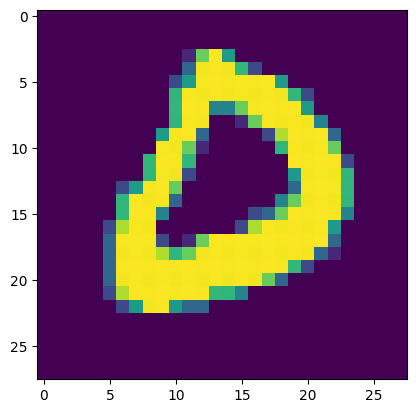

In [14]:
i=np.random.randint(1,60000)
plt.imshow(X[i].reshape(28,28))
print(f"The number is {int(Y[i])}")

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def initialize_parameters(input_size, output_size):
    W = np.random.randn(input_size, output_size) / np.sqrt(input_size)
    b = np.zeros((1, output_size))
    return W, b

def forward_pass(X, W, b):
    Z = np.dot(X, W) + b
    return Z, softmax(Z)

def backward_pass(X, y, Z, A, W, b, learning_rate):
    m = X.shape[0]

    dZ = A - y
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ, axis=0, keepdims=True) / m

    W -= learning_rate * dW
    b -= learning_rate * db

    return W, b

def train_model(X, y, num_classes, learning_rate, epochs):
    input_size = X.shape[1]
    W, b = initialize_parameters(input_size, num_classes)

    for epoch in range(epochs):
        Z, A = forward_pass(X, W, b)
        W, b = backward_pass(X, y, Z, A, W, b, learning_rate)

        if epoch % 50 == 0:
            loss = -np.mean(np.log(A[np.arange(len(y)), np.argmax(y, axis=1)]))
            print(f'Epoch {epoch}, Loss: {loss}')

    return W, b

One-hot encoding

In [18]:
y_train = y_train.astype(np.int64)
y_train_one_hot = np.zeros((y_train.size, 10))
y_train_one_hot[np.arange(y_train.size), y_train] = 1
y_test = y_test.astype(np.int64)
y_one_hot_1 = np.zeros((y_test.size, 10))
y_one_hot_1[np.arange(y_test.size), y_test] = 1

In [19]:
learning_rate = 0.01
epochs = 250
num_classes = 10

# Train the model
W, b = train_model(x_train, y_train_one_hot, num_classes, learning_rate, epochs)

Epoch 0, Loss: 2.388585262990262
Epoch 50, Loss: 1.9019338956738872
Epoch 100, Loss: 1.5845698701153303
Epoch 150, Loss: 1.3644595539751672
Epoch 200, Loss: 1.2084884852209337


In [20]:
def predict(X, W, b):
    _, A = forward_pass(X, W, b)
    return np.argmax(A, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = predict(x_test, W, b)
y_true = np.argmax(y_one_hot_1, axis=1)
acc = accuracy(y_true, y_pred)
print("Accuracy:", acc)

Accuracy: 0.801


[3]


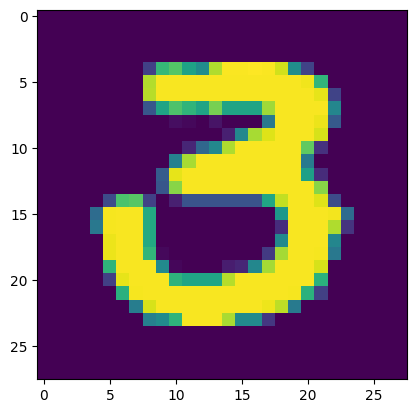

In [42]:
i=np.random.randint(1,12000)
print(predict(x_test[i],W,b))
plt.imshow(x_test[i].reshape(28,28))